## Statistics Final Project

Name : Santhosh Pattamudu Manoharan


Dataset Name : House Prediction 2023 Posgraduate DSUB (Kaggle Competition)

Dataset Link : https://www.kaggle.com/competitions/housing-house-prediction-2023-posgraduate-dsub/overview

Dataset Overview:

This dataset contains information about houses, including details like the number of rooms, type of property, price, method of sale, and location. It's a mix of numbers (like room count, distance to city center) and categories (like suburb names, sales method). These details help us understand what influences house prices. For example, we can see how factors like the size of the property, its location, and other characteristics of the property affect the price. By studying this data, we can develop methods to predict house prices more accurately, which can be useful for buyers, sellers, and real estate professionals in making informed decisions.

Features of this Dataset:

- Suburb
- Address
- Rooms
- Type
- Price
- Method
- SellerG
- Date
- Distance
- Postcode
- Bedroom2
- Bathroom
- Car
- Landsize
- BuildingArea
- YearBuilt
- CouncilArea
- Lattitude
- Longtitude
- Regionname
- Propertycount
- Year


In this analyses we will be using the following features as they are the numerical and helps in the linear modeling. 

- Rooms
- Distance
- Bedroom2
- Bathroom
- Car
- Landsize
- BuildingArea
- Propertycount
- Lattitude
- Longtitude
- Price


## Loading the data

In [24]:
library(tidyverse)

# Read the CSV file into a data frame
data <- read.csv("house_price_clean.csv")

# View the first few rows of the data frame
head(data)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,⋯,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,X,year
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<lgl>,<int>
1,0,Aberfeldie,241 Buckley St,4,h,1380000,VB,Nelson,8/12/2017,7.5,⋯,766,126,1970,Moonee Valley,-37.75595,144.9055,Western Metropolitan,1543,NA,2017
2,1,Northcote,67 Charles St,2,h,1100000,SP,Jellis,5/20/2017,5.5,⋯,189,126,1970,Darebin,-37.77670,144.9924,Northern Metropolitan,11364,NA,2017
3,2,Balwyn North,42 Maud St,3,h,1480000,PI,Jellis,10/15/2016,9.2,⋯,605,116,1950,Boroondara,-37.79510,145.0696,Southern Metropolitan,7809,NA,2016
4,3,Brunswick,13 Percy St,3,h,1055000,S,Nelson,5/7/2016,5.2,⋯,324,126,1930,Moreland,-37.76530,144.9586,Northern Metropolitan,11918,NA,2016
5,4,Templestowe Lower,253 Thompsons Rd,4,h,1000000,VB,hockingstuart,8/13/2016,13.8,⋯,728,164,1970,Manningham,-37.76800,145.1027,Eastern Metropolitan,5420,NA,2016
6,5,Coburg,4/34 Gladstone St,2,u,650000,S,Barry,4/29/2017,7.8,⋯,136,81,1975,Moreland,-37.74490,144.9754,Northern Metropolitan,11204,NA,2017


## Data Transformation 

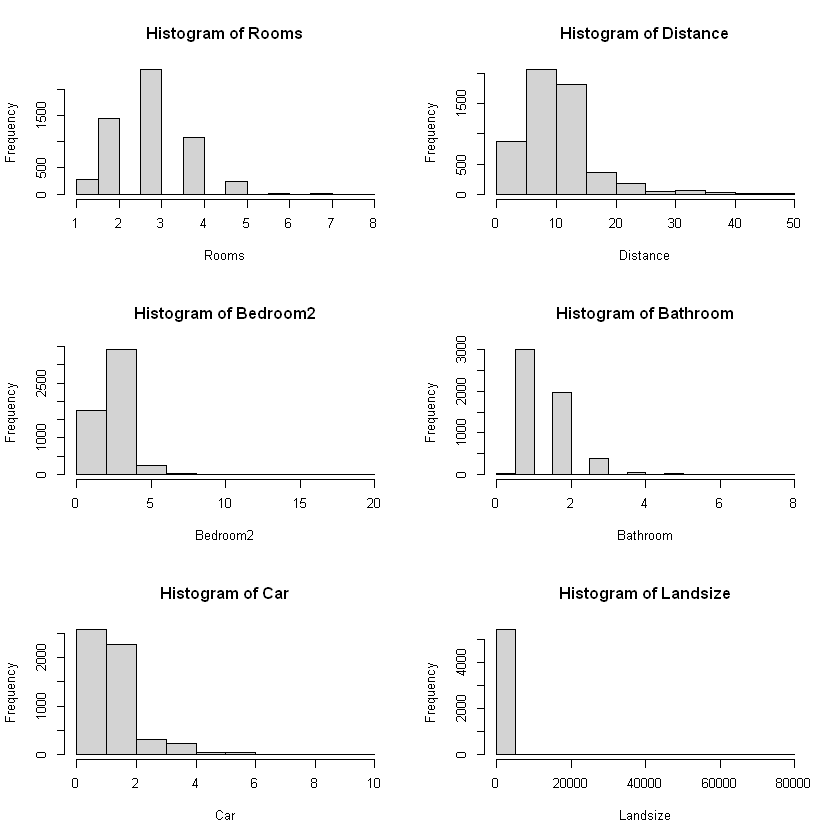

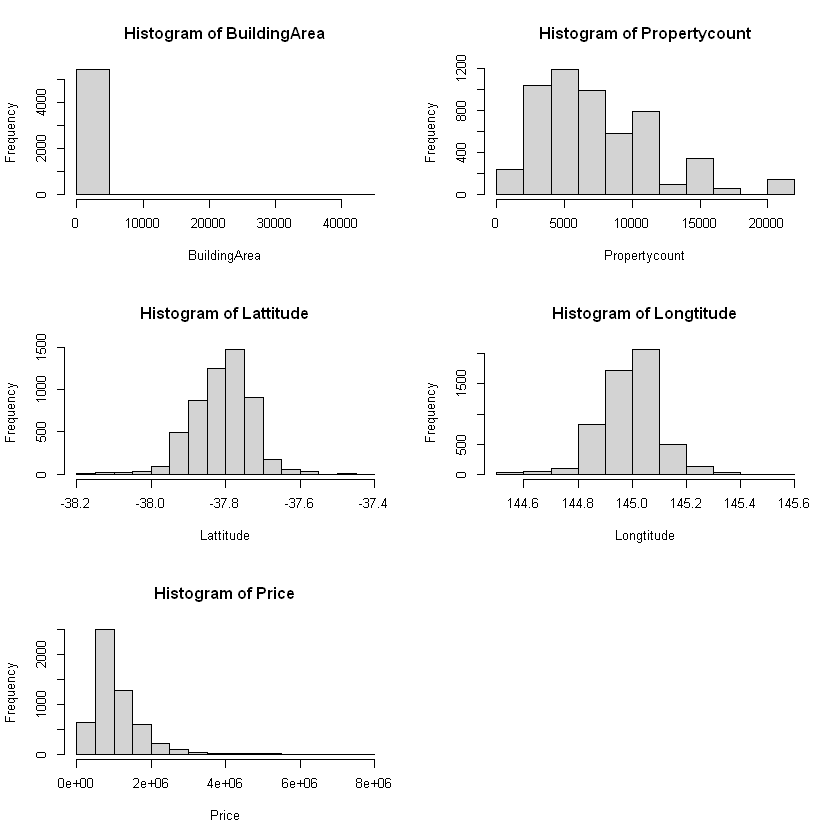

In [25]:
#slicing the data
data <- data[0:5432,]

#reorder the columns
data_num <-data   %>%
  select(Rooms, Distance, Bedroom2, Bathroom,Car,Landsize,BuildingArea,Propertycount,Lattitude,Longtitude,Price)


par(mfrow=c(3, 2))

# Loop through each column and plot its histogram
for (col in names(data_num)) {
  hist(data[[col]], main=paste("Histogram of", col), xlab=col)
}

As most of the features are skewed, applying Log transformation to reduce bias due to the skewness.  

In [26]:
# Apply log transformation to all the features.
data$Rooms <- log(data$Rooms)
data$Distance <- log(data$Distance)
data$Bedroom2 <- log(data$Bedroom2)
data$Bathroom <- log(data$Bathroom)
data$Car <- log(data$Car)
data$Landsize <- log(data$Landsize)
data$BuildingArea <- log(data$BuildingArea)
data$Propertycount <- log(data$Propertycount)
data$Price <- log(data$Price)

### Correlation Plot

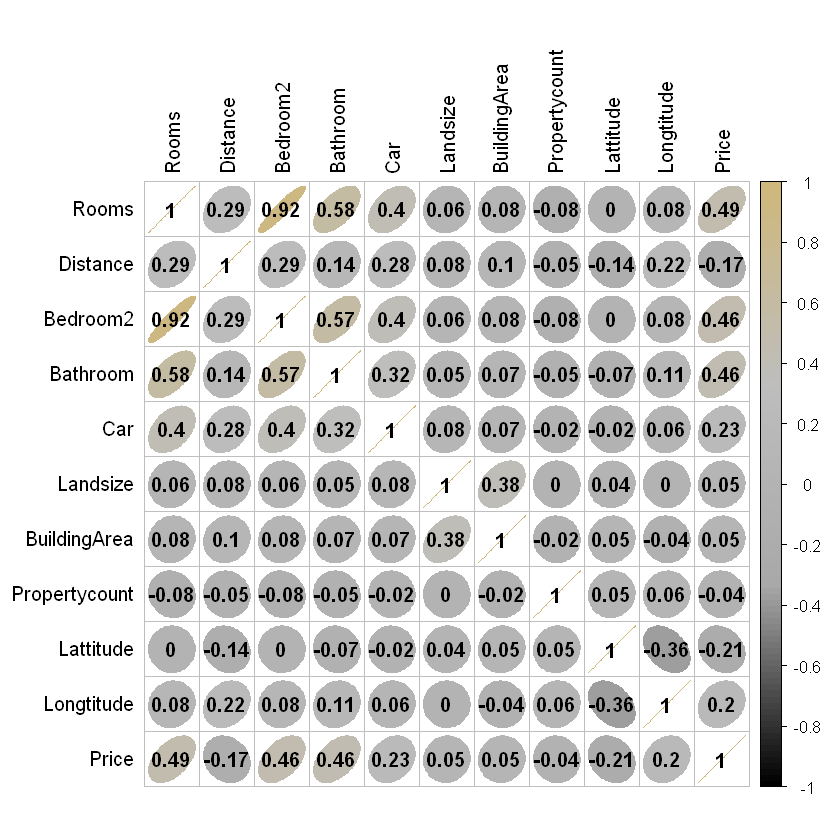

In [30]:
library(corrplot)
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(data_num), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

### Removing (Inf or -Inf) from the dataset

When performing a log transformation on data, it's common to encounter situations where certain data points become infinite. To address this issue it is necessary to remove those data points.

In [ ]:
d <- data[!apply(data, 1, function(row) any(is.infinite(row))), , drop = FALSE]

### Types of houses in Autralia 


There are three typee of categories in this dataset and the following are the key for the types of the column.

* h - House, Cottage, Villa ,Semi, Terrace
* u - Unit, Duplex
* t - Townhouse

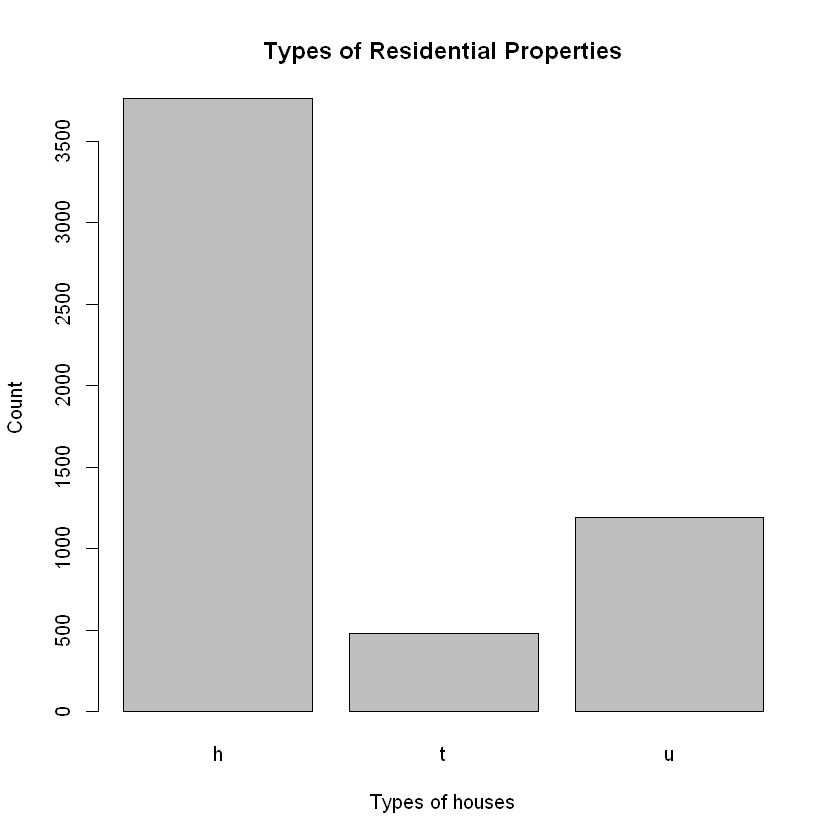

In [36]:
barplot(table(as.factor(data$Type)),main = "Types of Residential Properties", xlab = "Types of houses", ylab = "Count")


We can see that the house type is significantly more than the other types like townhouses and duplex units. Around more than 3500 units of houses, 500 townhouses and then 1500 duplex units.

### Properties in Different Regions

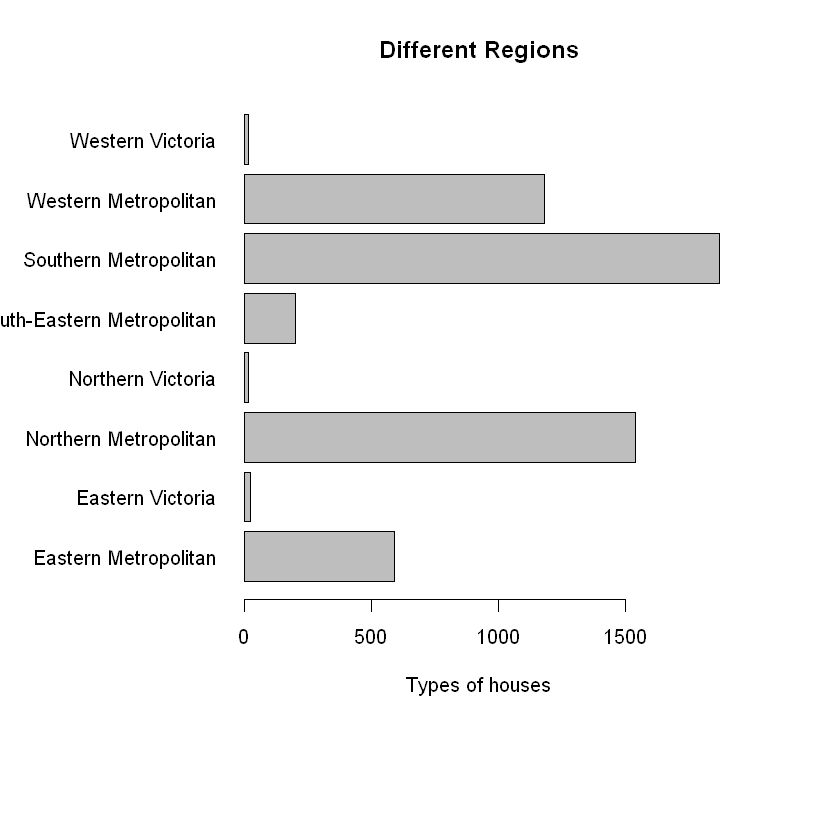

In [61]:
par(mar = c(10, 10, 4, 5))  
barplot(table(as.factor(data$Regionname)),main = "Different Regions", xlab = "Types of houses",horiz = TRUE,las = 1)

The Southern Metropolitan region has the highest number of houses whereas the Victoria regions such as Western Victoria, Northern Victoria and Eastern Victoria has lowest properties. This information can be valuable for land promotors to make investments in these locations.

# Statistical Analysis on Australian House Price Prediction 


## 1. Hypothesis Testing

In this analyses we will test the hypothesis. **Whether the Average Distance from the Central Business District of Australia residential property is 6.87Kms or not**.

$H_0 = \text{The Average distance from the Central Business District of Australian Residential Property is equal to 6.87kms}$


$H_A =\text{ The Average distance from the Central Business District of Australian Residential Property is not equal to 6.87 kms}$

Since we do not know the population variance, so using the T-test would give accurate results.


To ensure robust results, we take sample under the 30 rows, as it provided enough observations to reliable estimation of the population average of the distance from Central Business District.

In [19]:

distance <- d$Distance


distance <- sample(distance,28)

# Calculate sample mean and standard deviation
sample_mean <- mean(distance)
sample_sd <- sd(distance)

# Specified value
specified_value <- 6.7

# Perform one-sample t-test
test_result <- t.test(distance, mu = specified_value)

# Extract test statistic and p-value
test_statistic <- test_result$statistic
p_value <- test_result$p.value

# Print results
cat("Test Statistic:", test_statistic, "\n")
cat("P-value:", p_value, "\n")

# Make decision
alpha <- 0.05
if (p_value < alpha) {
  cat("Reject the null hypothesis. There is evidence to support the claim that the average distance from CBD in Australia is different from", specified_value, "kilometers.\n")
} else {
  cat("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average distance from CBD in Australia is different from", specified_value, "kilometers.\n")
}


Test Statistic: -36.07498 
P-value: 2.212278e-24 
Reject the null hypothesis. There is evidence to support the claim that the average distance from CBD in Australia is different from 6.7 kilometers.


From the results we can conclude that we reject the null hypothesis in favour of the distance from the CBD for an Australian Residential property is not equal to 6.87kms.

## 2. Confidence Interval

It can be found using the confidence interval method in which the range of the population parameters likely to be present based on the confidence and the margin of error in the data. It is very helpful in inferential statistics by providing the uncertainity in the population parameters helping in decision making process.


**Finding the mean sale price of the houses in Australia, assuming this data as the sample using the confidence interval based on the charateristics of sample data and confidence level (95%).** 









In [20]:
# Set the confidence level
confidence_level <- 0.95  # 95% confidence level

sale_price <- exp(d$Price)

# Calculate the sample mean and standard error
sample_mean <- mean(sale_price)
sample_sd <- sd(sale_price)
standard_error <- sample_sd / sqrt(length(sale_price))

# Calculate the margin of error
z_value <- qnorm((1 + confidence_level) / 2)
margin_of_error <- z_value * standard_error

# Calculate the confidence interval
lower_bound <- sample_mean - margin_of_error
upper_bound <- sample_mean + margin_of_error

# Output the confidence interval
cat("Confidence Interval (", confidence_level * 100, "%): [", lower_bound, ", ", upper_bound, "]\n")

Confidence Interval ( 95 %): [ 1127405 ,  1167025 ]


Based on the results, we can conclude that the Average price of the Australian house will fall inbetween 1127405 and 1167025. 

### 3. Regression Modeling 

Regression modelling invovlee in finding the mathematical relationship between the independent variables and the dependent variables, they mostly used to predict the dependent variables based on the change of independent variables.

**Predicting the price of the residential property based on the independent features like the numbers of rooms, distance from the CBD, number of bedrooms, number of bathrooms, number of cars, the landsize, building area, number of property in the community and the location metrics.**



In [21]:

mlr_model <- lm(Price ~ Rooms + Distance + Bedroom2 + Bathroom + Car + Landsize + BuildingArea + Propertycount + Lattitude + Longtitude , data = d)

mlr_model$coefficients

(Intercept)         Rooms      Distance      Bedroom2      Bathroom 
-180.44385825    0.55507969   -0.47865750    0.13419839    0.12163516 
          Car      Landsize  BuildingArea Propertycount     Lattitude 
   0.12019443    0.05135056    0.15692807   -0.00825802   -1.29690906 
   Longtitude 
   0.99621542

In [23]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Bedroom2 + Bathroom + 
    Car + Landsize + BuildingArea + Propertycount + Lattitude + 
    Longtitude, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03399 -0.20133 -0.00567  0.19580  1.52726 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.804e+02  6.451e+00 -27.973  < 2e-16 ***
Rooms          5.551e-01  5.340e-02  10.395  < 2e-16 ***
Distance      -4.787e-01  9.832e-03 -48.685  < 2e-16 ***
Bedroom2       1.342e-01  5.259e-02   2.552   0.0108 *  
Bathroom       1.216e-01  1.480e-02   8.221 2.64e-16 ***
Car            1.202e-01  1.256e-02   9.574  < 2e-16 ***
Landsize       5.135e-02  7.153e-03   7.179 8.21e-13 ***
BuildingArea   1.569e-01  1.240e-02  12.651  < 2e-16 ***
Propertycount -8.258e-03  7.602e-03  -1.086   0.2774    
Lattitude     -1.297e+00  6.298e-02 -20.592  < 2e-16 ***
Longtitude     9.962e-01  4.766e-02  20.901  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '*

###        4.    F-Test

Assuming the significance level  $\alpha = 0.05 $ to determine if atleast one of the features is related to the response variable Y



$H_o = $ No Feature is related to the response variable "Price"


$H_A = $ Atleast one feature is related to the response variable "Price" 

In [233]:
anova(mlr_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Rooms,1,255.3490302,255.3490302,2415.061133,0.000000e+00
Distance,1,181.7381335,181.7381335,1718.857919,1.378091e-316
Bedroom2,1,2.0189265,2.0189265,19.094769,1.273052e-05
Bathroom,1,27.2680875,27.2680875,257.898369,2.056508e-56
Car,1,16.5375728,16.5375728,156.410421,2.793098e-35
Landsize,1,8.9394285,8.9394285,84.548065,5.695743e-20
BuildingArea,1,16.7944179,16.7944179,158.839632,8.589566e-36
Propertycount,1,0.5423744,0.5423744,5.129713,2.356894e-02
Lattitude,1,94.7416802,94.7416802,896.055682,4.486357e-179




From the results tables we can clearly see that many features has P-value less than the significance level. 



## 5. Diagnostics

Model diagnostics are essential in assessing the validity and reliability of linear regression models, these methods identifies the issues with the model. Some of the diagonistics we have done in this analysis are as follows:

- Goodness of Fit ($R^2$) 
- Forward Selection
- Residual Analysis
    - Linearity
    - Normality
    - Constant Variance
     


###  a). Goodness of Fit ($R^2$)

In [234]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Bedroom2 + Bathroom + 
    Car + Landsize + BuildingArea + Propertycount + Lattitude + 
    Longtitude, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03399 -0.20133 -0.00567  0.19580  1.52726 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.804e+02  6.451e+00 -27.973  < 2e-16 ***
Rooms          5.551e-01  5.340e-02  10.395  < 2e-16 ***
Distance      -4.787e-01  9.832e-03 -48.685  < 2e-16 ***
Bedroom2       1.342e-01  5.259e-02   2.552   0.0108 *  
Bathroom       1.216e-01  1.480e-02   8.221 2.64e-16 ***
Car            1.202e-01  1.256e-02   9.574  < 2e-16 ***
Landsize       5.135e-02  7.153e-03   7.179 8.21e-13 ***
BuildingArea   1.569e-01  1.240e-02  12.651  < 2e-16 ***
Propertycount -8.258e-03  7.602e-03  -1.086   0.2774    
Lattitude     -1.297e+00  6.298e-02 -20.592  < 2e-16 ***
Longtitude     9.962e-01  4.766e-02  20.901  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '*

The $R^2 = 0.5873 $ is low it shows that we need to work in the feature selection process by using the forward select method. 

### b) Forward Select

In [235]:
forward_select <- function(df, resp_str, maxk) {
  selected_features <- c() 
  other_feat <- setdiff(names(df), resp_str)
  Y <- df[[resp_str]]
  for (k in 1:maxk) {
    best_feature <- NULL
    low_sse <- Inf  
    
    for (feature in other_feat) {
      input_feature <- c(selected_features, feature)
      model <- lm(paste(resp_str, "~", paste(input_feature, collapse = " + ")), data = df)
      y_hat <- predict(model, newdata = df)
      sse <- sum((Y - y_hat)^2)
      
      if (sse < low_sse) {  
        low_sse <- sse  # Corrected variable name here
        best_feature <- feature
      }
    }
    selected_features <- c(selected_features, best_feature)
    other_feat <- setdiff(other_feat, best_feature)
    
    cat(paste("Step: ", k, " ", best_feature, " has been added.\n" ))
  }
  
  return(selected_features)
}

forward_select(d, "Price",5)

Step:  1   Rooms  has been added.
Step:  2   Distance  has been added.
Step:  3   Longtitude  has been added.
Step:  4   Lattitude  has been added.
Step:  5   BuildingArea  has been added.


[1] "Rooms"        "Distance"     "Longtitude"   "Lattitude"    "BuildingArea"

In [236]:
mlr_model <- lm(Price ~ Rooms + Distance + Longtitude + Lattitude + BuildingArea, data = d)

mlr_model$coefficients

(Intercept)        Rooms     Distance   Longtitude    Lattitude BuildingArea 
-188.3589329    0.8439359   -0.4603634    1.0407100   -1.3347828    0.1918555

### c) Residual Analysis

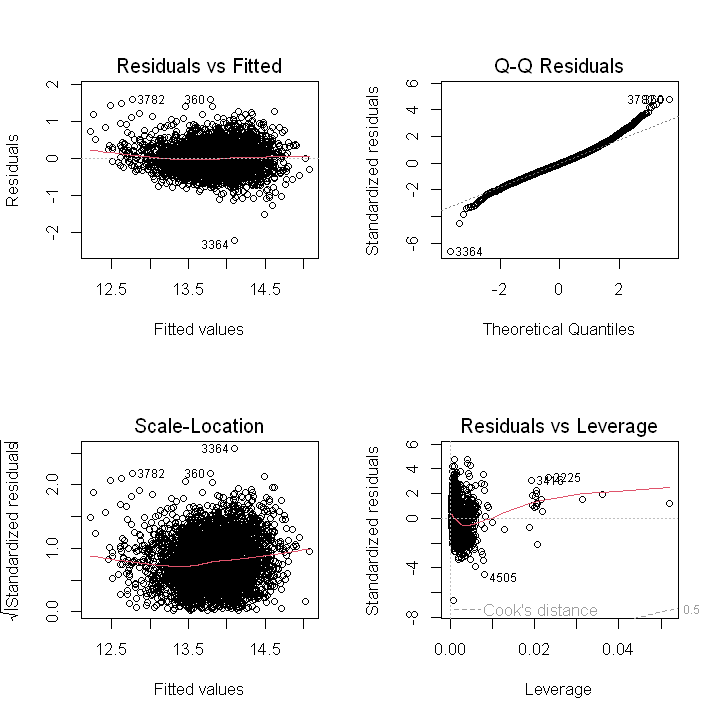

In [238]:
diag_1 = data.frame(yhat = fitted(mlr_model), r = resid(mlr_model,type = "pearson"), y = d$Price,
                           Rooms = d$Rooms, Distance =  d$Distance , Longtitude = d$Longtitude , Lattitude = d$Lattitude , BuildingArea = d$BuildingArea , Car = d$Car , Bathroom = d$Bathroom)


par(mfrow = c(2,2))
plot(mlr_model)

Constant Variance - The variance is the constant across the overall data.

Normality - It can be inferred from the QQ Plot that data follows a Normal Distribution


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


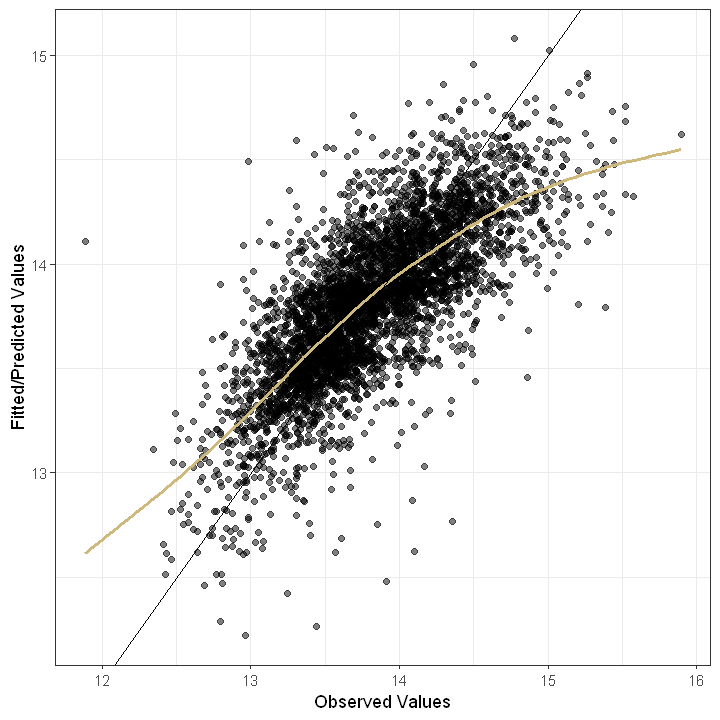

In [239]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(diag_1, aes(x = y, y = yhat)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

Linearity - The above plot shows that the model captures most of variance but it overpredicts and underpredicts in both tails.

### Report

## 1. Introduction 

The 5% of Australian GDP is contribbuted by the Housing market. It is very stable than many other countries, many news and reports showing that by 2030 there will be lot of investments in the residential housing market of the Australia. For buyers and sellers, in the growing market it is necessary to have a tool to estimate the housing price based on some factors like numbers of bedrooms, bathrooms, car parking slots, distance from the central business districts and etc.

Prior Research - https://propertyupdate.com.au/predicted-house-prices-for-australia-in-2030/#:~:text=The%20average%20annual%20growth%20rate,around%20%241.2%20million%20in%202030.

The data is collected by the University of Barcelona, for a data sceince postgraduate competition in kaggle.

There some questions which are answered in this project and they are as follows
* Whether the average distance from the Central Business District of Australia is 6.87kms or not?
* Understand the width of the mean sale price of residential properties in Australia.
* Estimate the sale price based on the other predictors like rooms, building area, number of bathrooms etc.
* To find out whether at least one predictor variable is contributing in the estimation of sale price of the residential housing market.
* Are the assumptions of linear regression are violated or not?


## 2. Methods/ Results

* **Data Source** The data has been obtained from the Kaggle competition which was collected by the University of Barcelona, for a data science postgraudate competition. 

* **The exploratory Analysis** 


The histogram of all the numerical features


<img src="images/hist_1.png" alt="Image Description" width="500" height="500">\

<img src="images/hist_2.png" alt="Image Description" width="500" height="500">\

We can see that the most of them are skewed So applying log transformations to all the numerical columns. 


<img src="images/pairwise.png" alt="Image Description" width="500" height="500">\

From the correlation plot we can infer some information about the correlation between the target variable and the predictors.


<img src="images/region_hist.png" alt="Image Description" width="500" height="500">\

We can see that the house type is significantly more than the other types like townhouses and duplex units. Around more than 3500 units of houses, 500 townhouses and then 1500 duplex units.


<img src="images/type_hist.png" alt="Image Description" width="500" height="500">

The Southern Metropolitan region has the highest number of houses whereas the Victoria regions such as Western Victoria, Northern Victoria and Eastern Victoria has lowest properties. This information can be valuable for land promotors to make investments in these locations.


* The following statistical analyses have been done to answer the research questions in the introduction.

    1. Hypothesis Testing
    2. Confidence Interval
    3. Linear Modeling
    4. F Test
    5. Model Diagonistics



### 1. Hypothesis Testing 

In this analyses we will test the hypothesis. **Whether the Average Distance from the Central Business District of Australia residential property is 6.87Kms or not**.

$H_0 = \text{The Average distance from the Central Business District of Australian Residential Property is equal to 6.87kms}$


$H_A = \text{ The Average distance from the Central Business District of Australian Residential Property is not equal to 6.87 kms}$

Since we do not know the population variance, so using the T-test would give accurate results.

To ensure robust results, we take sample under the 30 rows, as it provided enough observations to reliable estimation of the population average of the distance from Central Business District.

$$P-value: 2.212278e-24 $$


From the results we can conclude that we reject the null hypothesis in favour of the distance from the CBD for an Australian Residential property is not equal to 6.87kms.

## 2. Confidence Interval

It can be found using the confidence interval method in which the range of the population parameters likely to be present based on the confidence and the margin of error in the data. It is very helpful in inferential statistics by providing the uncertainity in the population parameters helping in decision making process.


**Finding the mean sale price of the houses in Australia, assuming this data as the sample using the confidence interval based on the charateristics of sample data and confidence level (95%).** 

$$ \text{Confidence Interval - 95\%: [ 1127405 ,  1167025 ] }$$

Based on the results, we can conclude that the Average price of the Australian house will fall inbetween 1127405 and 1167025. 

### 3. Regression Modeling 

Regression modelling invovlee in finding the mathematical relationship between the independent variables and the dependent variables, they mostly used to predict the dependent variables based on the change of independent variables.

**Predicting the price of the residential property based on the independent features like the numbers of rooms, distance from the CBD, number of bedrooms, number of bathrooms, number of cars, the landsize, building area, number of property in the community and the location metrics.**



###        4.    F-Test

Assuming the significance level  $\alpha = 0.05 $ to determine if atleast one of the features is related to the response variable Y



$H_o = $ No Feature is related to the response variable "Price"


$H_A = $ Atleast one feature is related to the response variable "Price" 



From the results tables we can clearly see that many features has P-value less than the significance level. 

## 5. Diagnostics

Model diagnostics are essential in assessing the validity and reliability of linear regression models, these methods identifies the issues with the model. Some of the diagonistics we have done in this analysis are as follows:

- Goodness of Fit ($R^2$) 
- Forward Selection
- Residual Analysis
    - Linearity
    - Normality
    - Constant Variance


The $R^2 = 0.5873 $ is low it shows that we need to work in the feature selection process by using the forward select method. 


<img src="images/goodness_1.png" alt="Image Description" width="500" height="500">\

<img src="images/goodness_2.png" alt="Image Description" width="500" height="500">\

Linear Modeling Assumptions :


Constant Variance - The variance is the constant across the overall data.

Normality - It can be inferred from the QQ Plot that data follows a Normal Distribution

Linearity - The above plot shows that the model captures most of variance but it overpredicts and underpredicts in both tails.

### 3.  Conclusion:

From this analysis, we got some great insight about the australian housing market, which is the higher contributor to the nation's GDP. Right from the estimation of the average sale price of an property in The Australia to ensuring the violation of linear modeling. 

Next, we can proceed on the model selection process, using the AIC, BIC and Adjusted R^2 to select the best model based on the combination of all predictors contributing to the prediciton of the target variable with less error.